In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import kaplanmeier as km
from lifelines import KaplanMeierFitter
import numpy as np
import csv

In [2]:
adjusted_publication_newPIsonly = pd.read_csv('/Users/shemingrong/PROJECT1_gender_differences/adjusted_publication_newPIsonly.csv')
adjusted_publication_new = pd.read_csv('/Users/shemingrong/PROJECT1_gender_differences/adjusted_publication_new.csv')


# Gender differences in collaboration

In [3]:
def hist_plot(df, x, function, label):
    data = df[['Gender', x]]
    data_F = data[data['Gender'] == 'female']
    data_M = data[data['Gender'] == 'male']
    smean_F = data_F[x].mean()
    smean_M = data_M[x].mean()
    print(smean_F, smean_M)
    ax = sns.kdeplot(data_M[x], label='M', linewidth=3)
    ax = sns.kdeplot(data_F[x],  label='F', linewidth=3)
    ax = plt.axvline(smean_F, color='#f16c23', linestyle='solid', linewidth=3)
    ax = plt.axvline(smean_M, color='#2b6a99', linestyle='solid', linewidth=3)

    plt.xscale(function)
    plt.xlabel(label, fontsize=30)
    plt.ylabel('density', fontsize=30)
    plt.xlim(df[x].min(), df[x].max())
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # plt.legend(fontsize=20)
    return ax


In [6]:
def collaboration_gender_compare_1():
    fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey=True)
    fig.tight_layout()
    plt.subplots_adjust(left= 0.09, bottom=0.12, right=0.95, top=0.95, wspace=None, hspace=0.3)
    ax1 = plt.subplot(221)
    # ax1 = hist_plot(adjusted_publication_newPIsonly, 'indegree', 'log', 'network size')
    ax1 = hist_plot(adjusted_publication_new, 'residuals.degree', 'linear', 'adjusted network size')
    plt.legend(fontsize=20)
    ax2 = plt.subplot(222)
    # ax2 = hist_plot(adjusted_publication_newPIsonly, 'strength.mean', 'log', 'mean tie strength')
    ax2 = hist_plot(adjusted_publication_new, 'residuals.links', 'linear', 'adjusted tie strength')
    ax3 = plt.subplot(223)
    # ax3 = hist_plot(adjusted_publication_newPIsonly, 'clusteringcoefficient.global', 'linear', 'clustering coefficient')
    ax3 = hist_plot(adjusted_publication_new, 'residuals.cluster', 'linear', 'adjusted clustering coefficient')
    ax4 = plt.subplot(224)
    ax4 = hist_plot(adjusted_publication_new, 'residuals.average.coauthors', 'linear', 'average co-authors')
    plt.savefig("/Users/shemingrong/PROJECT1_gender_differences/graphs/collaboration_differences.pdf", dpi = 500)
    plt.show()

0.00937762252701602 -0.0010411144080051012
0.12822455208391306 -0.014235636831186995
0.09079693974117492 -0.0100803803837247
0.14921240259299023 -0.016565732065358028


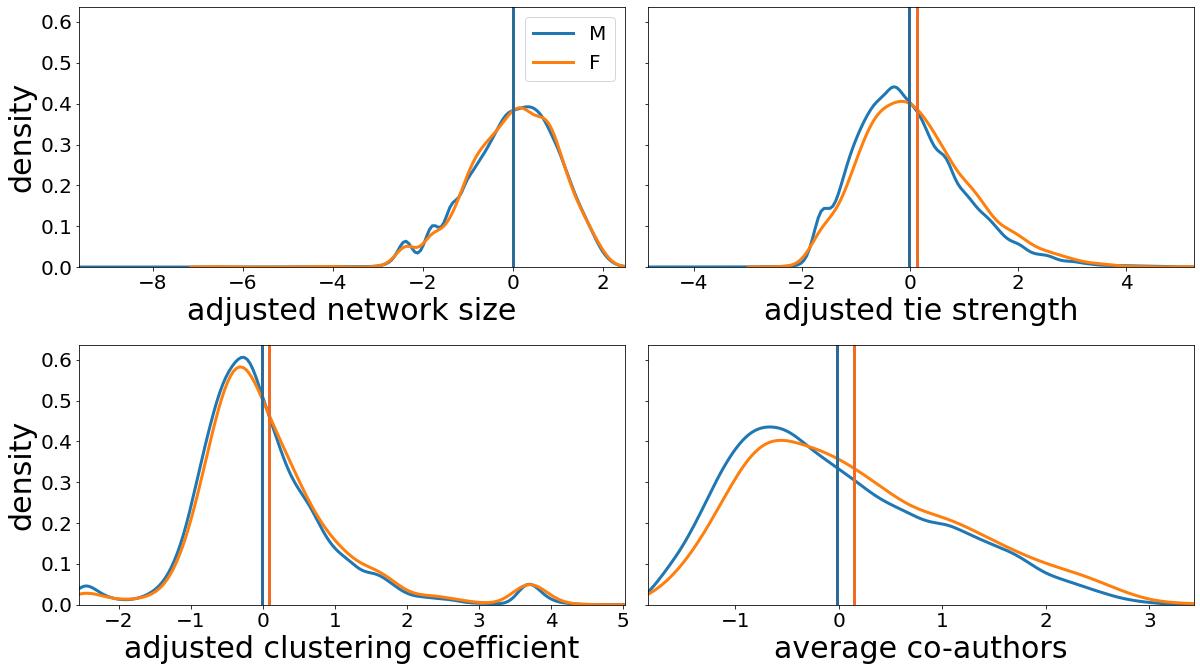

In [7]:
collaboration_gender_compare_1()

# Gender differences in career

In [8]:
def compute_cdf(data, time_col, event_col):
    data_sorted = data.sort_values(by=[time_col])
    total = len(data_sorted)
    data_sorted['cumulative_events'] = data_sorted[event_col].cumsum()
    data_sorted['cdf'] = data_sorted['cumulative_events'] / total
    return data_sorted

def KM_event_curve_cdf(ax, df, x, y):
    data = df[['Gender', x, y]]
    data_F = data[data['Gender'] == 'female']
    data_M = data[data['Gender'] == 'male']
    
    cdf_F = compute_cdf(data_F, x, y)
    cdf_M = compute_cdf(data_M, x, y)
    
    ax.plot(cdf_M[x], cdf_M['cdf'], label='M', linewidth=4)
    ax.plot(cdf_F[x], cdf_F['cdf'], label='F', linewidth=4)
    
    ax.set_xlabel('Time from first publication (years)', fontsize=15)
    ax.set_ylabel('Cumulative probability of being a PI', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set spine width
    ax.tick_params(width=2)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
    
    ax.legend(fontsize=10)
# KM_event_curve_cdf(new, 'time.PI', 'status.PI')


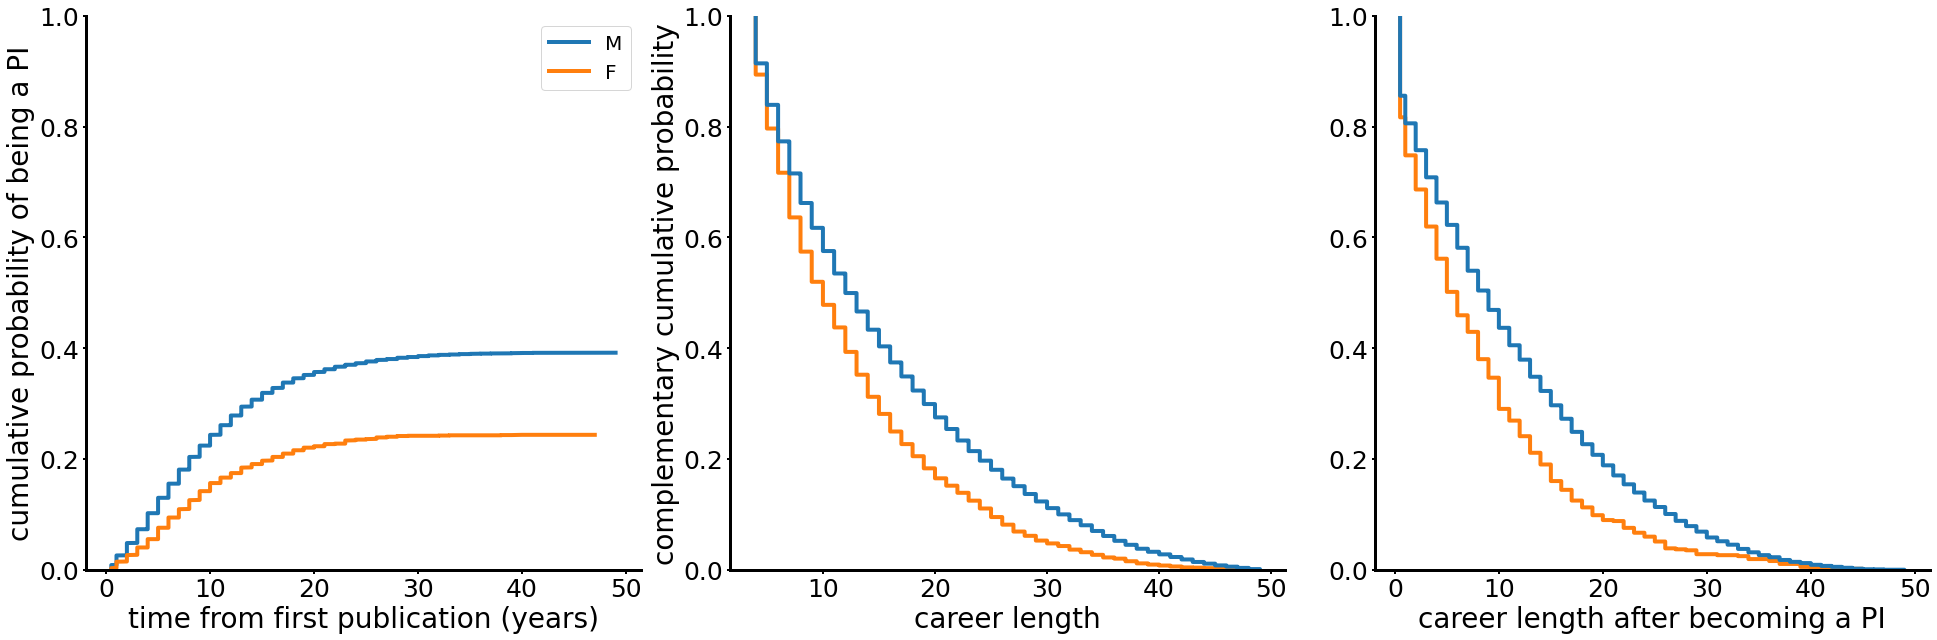

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def com_cum():
    fig = plt.figure(figsize=(27, 9))
    gs = GridSpec(1, 3, figure=fig)
    
    # First subplot
    ax1 = fig.add_subplot(gs[0, 0])
    KM_event_curve_cdf(ax1, adjusted_publication_new, 'time.PI', 'status.PI')
#     sns.ecdfplot(data=newPIsonly, x='time.PI', hue="Gender", ax=ax1)
    ax1.set_xlabel('time from first publication (years)', fontsize=28)
    ax1.set_ylabel('cumulative probability of being a PI', fontsize=28)
    plt.legend(fontsize=20)
    
    # Second subplot
    ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
    sns.ecdfplot(data=adjusted_publication_new, x='n.years', hue="Gender", complementary=True, legend=False, linewidth=4, ax=ax2)
    ax2.set_xlabel('career length', fontsize=28)
    ax2.set_ylabel('complementary cumulative probability', fontsize=28)  # Set shared y-axis label for second plot
    
    # Third subplot
    ax3 = fig.add_subplot(gs[0, 2], sharey=ax2)
    sns.ecdfplot(data=adjusted_publication_newPIsonly, x='nyears.PI', hue="Gender", complementary=True, legend=False, linewidth=4, ax=ax3)
    ax3.set_xlabel('career length after becoming a PI', fontsize=28)
    ax3.set_ylabel('')  # Clear y-axis label for third plot

    # Manually set y-axis label for the second and third plots to be shared
#     ax2.yaxis.set_label_coords(-0.15, 0.5)
#     ax3.yaxis.set_label_coords(-0.15, 0.5)

    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(width=2)
        for spine in ['top', 'bottom', 'left', 'right']:
            ax.spines[spine].set_linewidth(3)
    
    plt.tight_layout()
    plt.savefig("/Users/shemingrong/PROJECT1_gender_differences/graphs/gender_career.pdf")
    plt.show()

com_cum()

# Assortativity

In [10]:
import csv
import time
import os
import json
import ast
import pickle
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from itertools import combinations
import math
import pandas as pd
from tqdm import tqdm
import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats.stats import pearsonr
import matplotlib.gridspec as gridspec

/var/folders/bw/w2pkl8js06ngvf9n2yn4j_tr0000gn/T/ipykernel_48952/1326520636.py:16: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [25]:
dd = pd.read_csv('/Users/shemingrong/PROJECT1_gender_differences/focal_author_infos.csv')
dd.head()

,id,name,gender,doi,journal,is_alpha,year,numAuthor,coauthors,last_author
0,90460,R. A. Millikan,male,10.1103/PhysRev.1.218,PhysRev,False,1913-03-01,1,set(),False
1,57643,G. W. Stewart,male,10.1103/PhysRev.1.309,PhysRev,True,1913-04-01,2,{'247945'},False
2,23282,Alpheus W. Smith,male,10.1103/PhysRev.1.339,PhysRev,False,1913-05-01,1,set(),False
3,67661,Karl T. Compton,male,10.1103/PhysRev.1.382,PhysRev,False,1913-05-01,1,set(),False
4,39135,John Zeleny,male,10.1103/PhysRev.10.1,PhysRev,False,1917-07-01,1,set(),False


In [22]:
df_authors = pd.read_csv('/Users/shemingrong/PROJECT1_gender_differences/adjusted_publication_new.csv')
focal_authors = set(df_authors['author.name'].apply(str).tolist())
len(focal_authors)

23327

In [21]:
coauthor_tot = {}
with open('/Users/shemingrong/PROJECT1_gender_differences/focal_author_infos.csv', 'r') as f:
    for i, row in enumerate(csv.reader(f)):
        if i != 0:
            row[8] = ast.literal_eval(row[8])
            if row [0] not in coauthor_tot:
                coauthor_tot[row[0]] = list(row[8])
            else:
                coauthor_tot[row[0]] = coauthor_tot[row[0]] + list(row[8])
coauthor_unique = {i : set(coauthor_tot[i]) for i in coauthor_tot}

In [23]:
# coauthor_unique = dict(zip(focal_authors_sum['id'].apply(str), focal_authors_sum['unique coauthors'].apply(ast.literal_eval)))
# coauthor_tot = dict(zip(focal_authors_sum['id'].apply(str), focal_authors_sum['total coauthors'].apply(ast.literal_eval)))


gender_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['Gender']))
papers_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['no.of.papers']))
netsize = dict(zip(df_authors['author.name'].apply(str),df_authors['indegree']))
tie_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['average.links']))
cluster_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['clusteringcoefficient.global']))
ave_coauthors = dict(zip(df_authors['author.name'].apply(str),df_authors['average.coauthors']))
career_length_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['n.years']))
timepi_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['Time.to.PI']))
careerpi_dict = dict(zip(df_authors['author.name'].apply(str),df_authors['nyears.PI']))

In [26]:
common_papers = {}

with open('/Users/shemingrong/PROJECT1_gender_differences/focal_author_infos.csv', 'r') as f:
    for i, row in enumerate(csv.reader(f)):
        if i != 0:
            if row[0] in focal_authors:
                row[8] = ast.literal_eval(row[8])
                if len(row[8]) > 0:
                    for id in row[8]:
                        if id in focal_authors:
                            tup = (row[0], id)
                            if tup not in common_papers:
                                common_papers[tup] = 1
                            else:              
                                common_papers[tup] += 1  

common_papers_values = sorted(set(common_papers.values()))
author_pairs_count = {}
for i in common_papers_values:
    author_pairs_count[i] = set()
    for author_pair in common_papers:
        if common_papers[author_pair] == i:
            author_pairs_count[i].add(author_pair)

In [27]:
femaleauthor_pairs_count = {}
maleauthor_pairs_count = {}
fe_maleauthor_pairs_count = {}
for commons in author_pairs_count:    
    for i in author_pairs_count[commons]:
        if gender_dict[i[0]] == 'female' and gender_dict[i[1]] == 'female':
            if commons not in femaleauthor_pairs_count:
                femaleauthor_pairs_count[commons] = {i}
            else:
                femaleauthor_pairs_count[commons].add(i)
        elif gender_dict[i[0]] == 'male' and gender_dict[i[1]] == 'male':
            if commons not in maleauthor_pairs_count:
                maleauthor_pairs_count[commons] = {i}
            else:
                maleauthor_pairs_count[commons].add(i)
        elif gender_dict[i[0]] != gender_dict[i[1]]:
            if commons not in fe_maleauthor_pairs_count:
                fe_maleauthor_pairs_count[commons] = {i}
            else:
                fe_maleauthor_pairs_count[commons].add(i)

In [28]:
links_coauthors = {}
with open('/Users/shemingrong/PROJECT1_gender_differences/focal_author_infos.csv', 'r') as f:
    for i, row in enumerate(csv.reader(f)):
        if i != 0:
            if row[0] in focal_authors:
                row[8] = ast.literal_eval(row[8])
                if row[0] not in links_coauthors:
                    links = {}               
                    for coauthor in row[8]:
                        links[coauthor] = 1
                    links_coauthors[row[0]] = links
                else:
                    for coauthor in row[8]:
                        if coauthor not in links_coauthors[row[0]]:
                            links_coauthors[row[0]][coauthor] = 1
                        else:
                            links_coauthors[row[0]][coauthor] += 1
total_links = {}
for id in links_coauthors:
    links = links_coauthors[id]
    total_links[id] = sum(links.values())

In [35]:
def Pearson_colla_corre(result_output, result_output_p, common_gender_group):
    result_output= pd.DataFrame(columns=['Common papers', 'author pairs', 'network size', 'tie strength', 'clustering coefficient', 'coauthors per publication'])
    result_output_p = pd.DataFrame(columns=['Common papers', 'author pairs', 'network size', 'tie strength', 'clustering coefficient', 'coauthors per publication'])

    for commons in common_gender_group:      
        network_a = []
        network_b = []
        tie_a = []
        tie_b = []
        cc_a = []
        cc_b = []
        ac_a =[]
        ac_b = []
#         Jaccard_un = []
#         Jaccard_tot = []
        for i in common_gender_group[commons]:
            a = common_papers[i]
#             Jaccard_un.append(Jaccard_un_sum[i])
#             Jaccard_tot.append(Jaccard_tot_sum[i])

            network_a.append(netsize[i[0]])
            network_b.append(netsize[i[1]])

            tie_a.append((total_links[i[0]]-a)/(netsize[i[0]]-1))
            tie_b.append((total_links[i[1]]-a)/(netsize[i[1]]-1))

            cc_a.append(cluster_dict[i[0]])
            cc_b.append(cluster_dict[i[1]])  

            if papers_dict[i[0]] != a:
                ac_a.append((len(coauthor_tot[i[0]])-a)/(papers_dict[i[0]]-a))
            else:
                ac_a.append(0)
            if papers_dict[i[1]] != a:
                ac_b.append((len(coauthor_tot[i[1]])-a)/(papers_dict[i[1]]-a))
            else:
                ac_b.append(0)
#         print(commons,len(network_a), len(network_b))
        result_output.loc[a-1]=[commons, len(ac_a), round(pearsonr(network_a, network_b)[0], 4), round(pearsonr(tie_a, tie_b)[0], 4), round(pearsonr(cc_a, cc_b)[0], 4), round(pearsonr(ac_a, ac_b)[0], 4)]
        result_output_p.loc[a-1]=[commons, len(ac_a), round(pearsonr(network_a, network_b)[1], 4), round(pearsonr(tie_a, tie_b)[1], 4), round(pearsonr(cc_a, cc_b)[1], 4), round(pearsonr(ac_a, ac_b)[1], 4)]
#     result_output['Common papers'] = result_output['Common papers'].astype(int)
    result_output['Common papers'] = result_output['Common papers'].astype(str)
    return result_output, result_output_p

In [30]:
def corre_plot(ax, corre_df, p_df, x_label):
    def p_to_stars(p_val):
        if p_val < 0.001:
            return '***'
        elif p_val < 0.01:
            return '**'
        elif p_val < 0.05:
            return '*'
        else:
            return ''

    selected_attributes = ['network size', 'tie strength', 'clustering coefficient', 'coauthors per publication']
    coefficients_selected = corre_df[selected_attributes]
    p_values_selected = p_df[selected_attributes]
    
    stars_matrix = p_values_selected.applymap(p_to_stars).values
    
    max_abs_value = np.max(np.abs(coefficients_selected.values[~np.isnan(coefficients_selected.values)]))
    cax = ax.imshow(coefficients_selected.values.T, aspect='auto', cmap='RdBu_r', origin='lower', vmin=-max_abs_value, vmax=max_abs_value)  
    
    for i in range(stars_matrix.shape[1]):
        for j in range(stars_matrix.shape[0]):
            ax.text(j, i, stars_matrix[j, i], ha='center', va='center', color='black', fontsize=30)
    
    every_nth = 1
    
    ax.set_xticks(ticks=range(0, corre_df.shape[0], every_nth))
    ax.set_xticklabels(labels=corre_df["Common papers"].values[::every_nth], fontsize=40)
    ax.set_yticks(ticks=range(coefficients_selected.shape[1]))
    ax.set_yticklabels(labels=coefficients_selected.columns, fontsize=40)
    ax.set_xlabel(x_label, fontsize=40)
    
    return cax  # 返回imshow的输出



In [33]:
author_pairs_20 = {i: author_pairs_count[i] for i in author_pairs_count if i<=20}
femaleauthor_pairs_count_20 = {i: femaleauthor_pairs_count[i] for i in femaleauthor_pairs_count if i<=20} 
maleauthor_pairs_count_20 = {i: maleauthor_pairs_count[i] for i in maleauthor_pairs_count if i<=20}
fe_maleauthor_pairs_count_20 = {i: fe_maleauthor_pairs_count[i] for i in fe_maleauthor_pairs_count if i<=20}


In [36]:
df_corre_all_20, df_corre_all_p_20 = Pearson_colla_corre(pd.DataFrame(), pd.DataFrame(), author_pairs_20)
df_corre_female_20, df_corre_female_p_20 = Pearson_colla_corre(pd.DataFrame(), pd.DataFrame(), femaleauthor_pairs_count_20)
df_corre_male_20, df_corre_male_p_20 = Pearson_colla_corre(pd.DataFrame(), pd.DataFrame(), maleauthor_pairs_count_20)
df_corre_fe_male_20, df_corre_fe_male_p_20 = Pearson_colla_corre(pd.DataFrame(), pd.DataFrame(), fe_maleauthor_pairs_count_20)

/var/folders/bw/w2pkl8js06ngvf9n2yn4j_tr0000gn/T/ipykernel_48952/1151133817.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stars_matrix = p_values_selected.applymap(p_to_stars).values


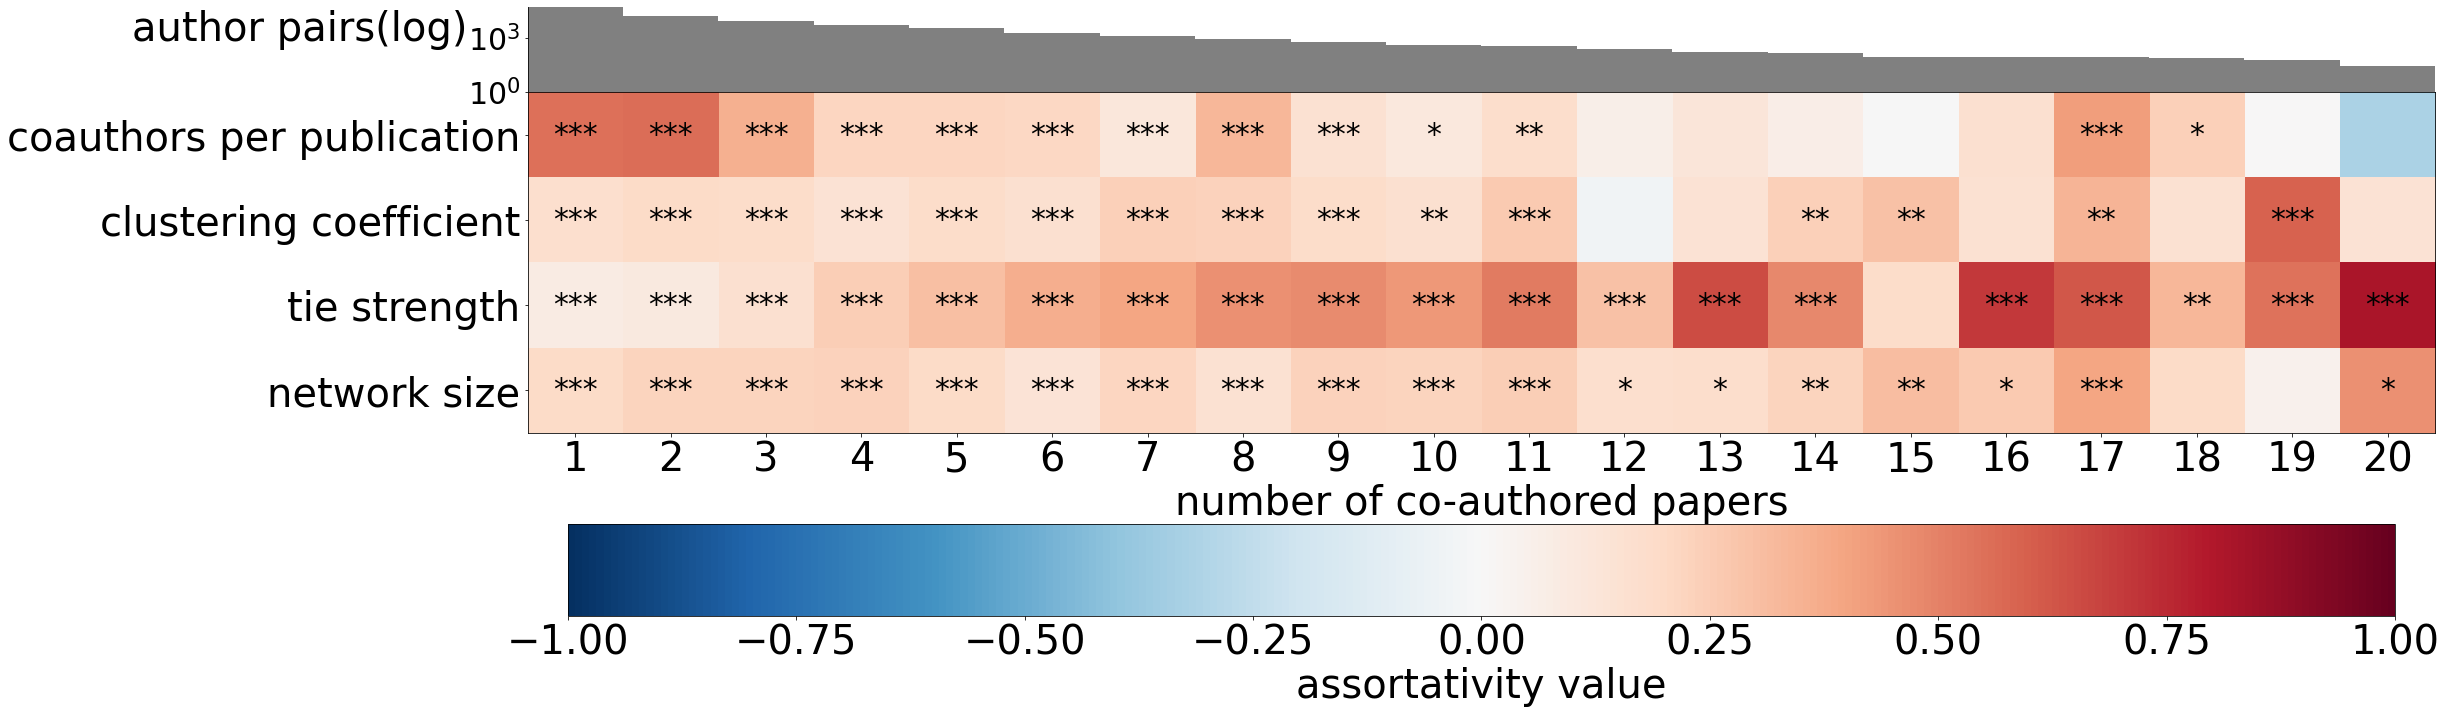

In [38]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties

def graph_7_1():
    fig = plt.figure(figsize=(34, 10))
    # 使用 GridSpec 定义子图的布局：仅包含第一个子图
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], hspace=0)
    
    # 你的dataframes和标签
    data_frames = [
        (df_corre_all_20, df_corre_all_p_20)
    ]
    
    labels = ['number of co-authored papers']
    max_author_pairs = max(df['author pairs'].max() for df, _ in data_frames)
   
    # 新增加：确定x的位置和每个bar的宽度
    caxes = []
    
    for i, ((corre_df, p_df), label) in enumerate(zip(data_frames, labels)):
        # 画柱状图
        ax_bar = plt.subplot(gs[2*i, :])
        ax_bar.bar(corre_df["Common papers"], corre_df['author pairs'], color='grey', width = 1)
        ax_bar.set_yscale('log')
        ax_bar.set_ylabel('author pairs(log)',rotation=0, labelpad=168, fontsize=40)
        ax_bar.set_ylim(1, max_author_pairs) 
        # 隐藏柱状图的上边界和右边界线
        ax_bar.spines['top'].set_visible(False)
        ax_bar.spines['right'].set_visible(False)

        # 画相关性图
        ax_corre = plt.subplot(gs[2*i+1, :], sharex=ax_bar)
        corre_df = corre_df.copy()  # Create a copy to avoid工作 on a slice
        corre_df.loc[:, "Common papers"] = corre_df['Common papers'].astype(float).astype(int)
        cax = corre_plot(ax_corre, corre_df, p_df, label)
        caxes.append(cax)
        
        ax_bar.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax_bar.tick_params(axis='y', labelsize=30)
        
    fig.tight_layout(pad=1.0)
    # 在所有子图的右侧绘制一个总的颜色条
    font_prop = FontProperties(size=40)  # 设置字体大小为14
    cbar = fig.colorbar(caxes[0], ax=fig.get_axes(), label='assortativity value', orientation='horizontal', pad=0.15)
   
    cbar.set_label('assortativity value', fontproperties=font_prop)
    cbar.ax.tick_params(labelsize=40)
    cbar.mappable.set_clim(-1, 1)
    plt.savefig('/Users/shemingrong/PROJECT1_gender_differences/graphs/assort_colla.pdf')
    
    plt.show()
    
graph_7_1()

## career

In [31]:
def Pearson_career_corre(df_career, df_career_pvalue, common_gender_group):
    df_career = pd.DataFrame(columns=['Common papers','author pairs', 'time to PI', 'career length', 'career length after PI'])
    df_career_pvalue = pd.DataFrame(columns=['Common papers','author pairs',  'time to PI', 'career length', 'career length after PI'])    
    for commons in common_gender_group:
        Jaccard_un = []
        Jaccard_tot = []
        career_a = []
        career_b = []
        timepi_a = []
        timepi_b = []
        careerpi_a = []
        careerpi_b = []   
        for i in common_gender_group[commons]:
            a = common_papers[i]
            career_a.append(career_length_dict[i[0]])
            career_b.append(career_length_dict[i[1]])
            if math.isnan(timepi_dict[i[0]]) is False and math.isnan(timepi_dict[i[1]]) is False: 
                timepi_a.append(timepi_dict[i[0]])
                timepi_b.append(timepi_dict[i[1]])

                careerpi_a.append(careerpi_dict[i[0]])
                careerpi_b.append(careerpi_dict[i[1]])
        if len(timepi_a) == 0:
            corre_time_pi = 0
            corre_career_pi = 0
            p_time_pi = 0
            p_career_pi = 0
        else:
            corre_time_pi = round(pearsonr(timepi_a, timepi_b)[0], 4)
            corre_career_pi = round(pearsonr(careerpi_a, careerpi_b)[0], 4) 
            p_time_pi = round(pearsonr(timepi_a, timepi_b)[1], 4)
            p_career_pi = round(pearsonr(careerpi_a, careerpi_b)[1], 4) 
            
        df_career.loc[a-1]=[commons,len(timepi_a), corre_time_pi, round(pearsonr(career_a, career_b)[0], 4), corre_career_pi]
        df_career_pvalue.loc[a-1]=[commons,len(timepi_a), p_time_pi, round(pearsonr(career_a, career_b)[1], 4), p_career_pi]
        
#     df_career['Common papers'] = df_career['Common papers'].astype(int)
    df_career['Common papers'] = df_career['Common papers'].astype(str)
    return df_career, df_career_pvalue

In [32]:
def corre_career_plot(ax, corre_df, p_df, x_label):
    def p_to_stars(p_val):
        if p_val < 0.001:
            return '***'
        elif p_val < 0.01:
            return '**'
        elif p_val < 0.05:
            return '*'
        else:
            return ''

    selected_attributes = ['time to PI', 'career length', 'career length after PI']
    coefficients_selected = corre_df[selected_attributes]
    p_values_selected = p_df[selected_attributes]

    stars_matrix = p_values_selected.applymap(p_to_stars).values

    max_abs_value = np.max(np.abs(coefficients_selected.values[~np.isnan(coefficients_selected.values)]))
    cax = ax.imshow(coefficients_selected.values.T, aspect='auto', cmap='RdBu_r', origin='lower', vmin=-max_abs_value, vmax=max_abs_value)  

    for i in range(stars_matrix.shape[1]):
        for j in range(stars_matrix.shape[0]):
            ax.text(j, i, stars_matrix[j, i], ha='center', va='center', color='black', fontsize=30)

    every_nth = 1
    ax.set_xticks(ticks=range(0, corre_df.shape[0], every_nth))
    ax.set_xticklabels(labels=corre_df["Common papers"].values[::every_nth], fontsize=40)
    ax.set_yticks(ticks=range(coefficients_selected.shape[1]))
    ax.set_yticklabels(labels=coefficients_selected.columns, fontsize=40)
    ax.set_xlabel(x_label, fontsize=40)
    
    return cax  # 返回imshow的输出


In [39]:
df_career_all_20, df_career_all_p_20 = Pearson_career_corre(pd.DataFrame(), pd.DataFrame(), author_pairs_20)
df_career_female_20, df_career_female_p_20 = Pearson_career_corre(pd.DataFrame(), pd.DataFrame(), femaleauthor_pairs_count_20)
df_career_male_20, df_career_male_p_20 = Pearson_career_corre(pd.DataFrame(), pd.DataFrame(), maleauthor_pairs_count_20)
df_career_fe_male_20, df_career_fe_male_p_20 = Pearson_career_corre(pd.DataFrame(), pd.DataFrame(), fe_maleauthor_pairs_count_20)

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


/var/folders/bw/w2pkl8js06ngvf9n2yn4j_tr0000gn/T/ipykernel_48952/2293285573.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stars_matrix = p_values_selected.applymap(p_to_stars).values


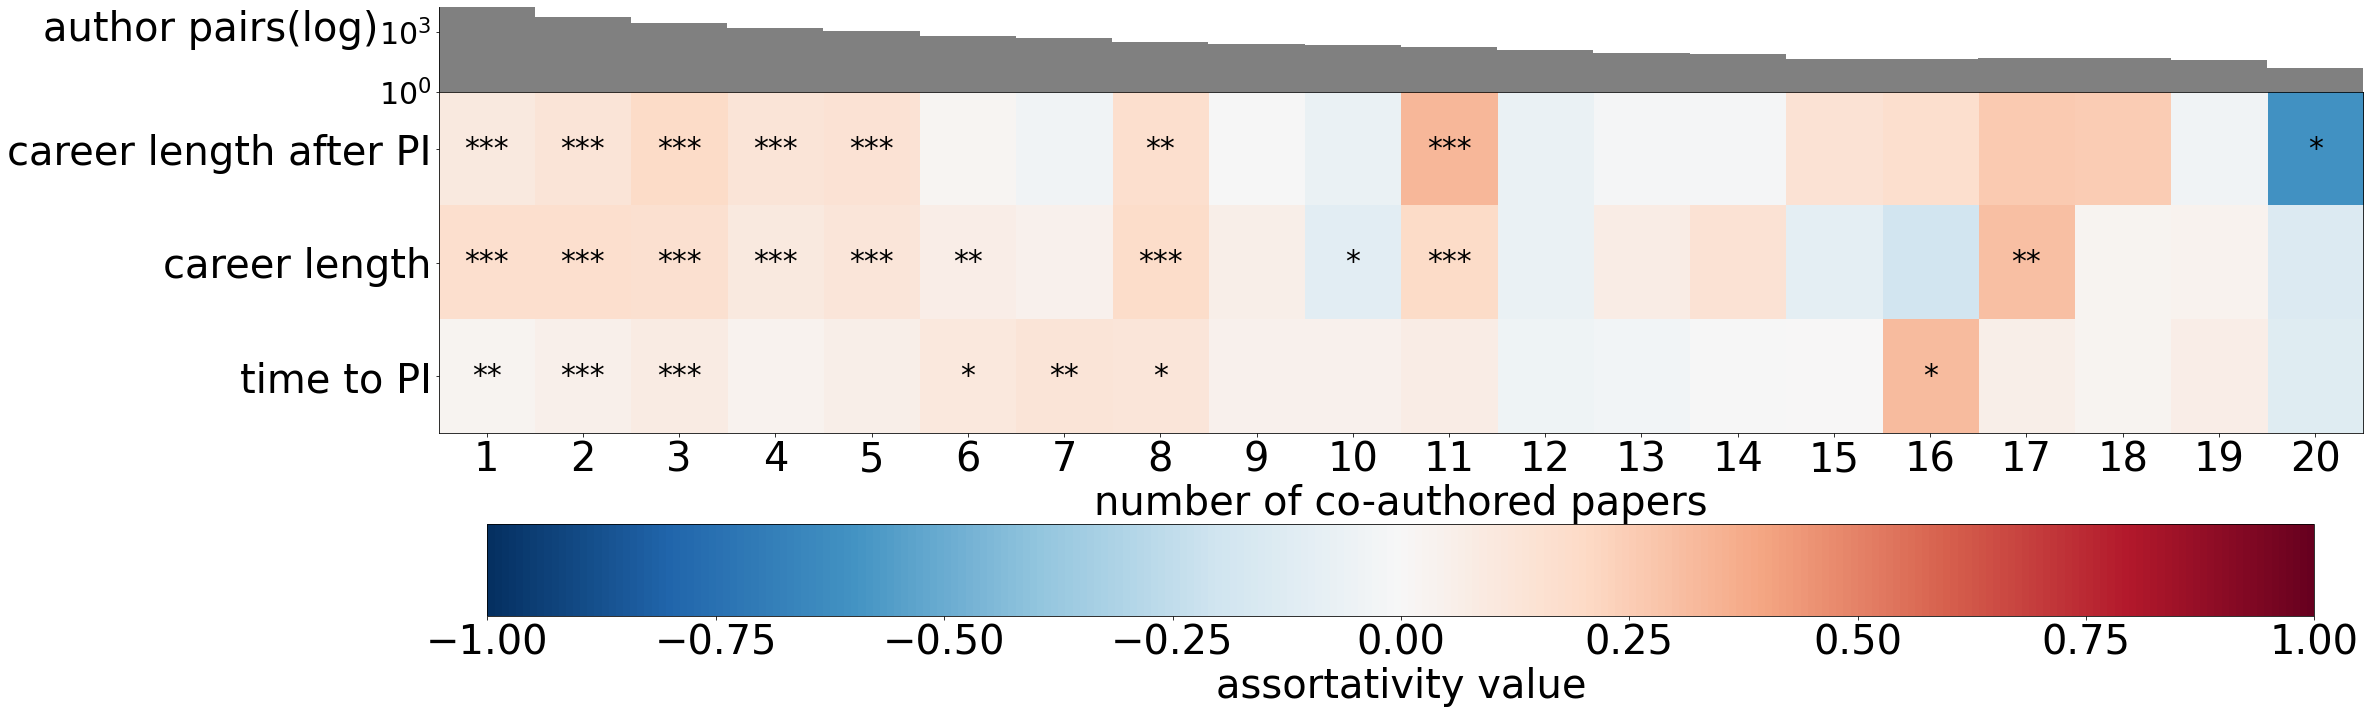

In [40]:
def graph_8_1():
    fig = plt.figure(figsize=(33, 10))
    # 使用 GridSpec 定义子图的布局：仅包含第一个子图
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], hspace=0)
    
    # 你的dataframes和标签
    data_frames = [
        (df_career_all_20, df_career_all_p_20)
    ]
    
    labels = ['number of co-authored papers']
    max_author_pairs = max(df['author pairs'].max() for df, _ in data_frames)
   
    # 新增加：确定x的位置和每个bar的宽度
    caxes = []
    
    for i, ((corre_df, p_df), label) in enumerate(zip(data_frames, labels)):
        # 画柱状图
        ax_bar = plt.subplot(gs[2*i, :])
        ax_bar.bar(corre_df["Common papers"], corre_df['author pairs'], color='grey', width = 1)
        ax_bar.set_yscale('log')
        ax_bar.set_ylabel('author pairs(log)',rotation=0, labelpad=168, fontsize=40)
        ax_bar.set_ylim(1, max_author_pairs) 
        # 隐藏柱状图的上边界和右边界线
        ax_bar.spines['top'].set_visible(False)
        ax_bar.spines['right'].set_visible(False)

        # 画相关性图
        ax_corre = plt.subplot(gs[2*i+1, :], sharex=ax_bar)
        corre_df = corre_df.copy()  # Create a copy to avoid工作 on a slice
        corre_df.loc[:, "Common papers"] = corre_df['Common papers'].astype(float).astype(int)
        cax = corre_career_plot(ax_corre, corre_df, p_df, label)
        caxes.append(cax)
        
        ax_bar.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax_bar.tick_params(axis='y', labelsize=30)
        
    fig.tight_layout(pad=1.0)
    # 在所有子图的右侧绘制一个总的颜色条
    font_prop = FontProperties(size=40)  # 设置字体大小为14
    cbar = fig.colorbar(caxes[0], ax=fig.get_axes(), label='assortativity value', orientation='horizontal', pad=0.15)
   
    cbar.set_label('assortativity value', fontproperties=font_prop)
    cbar.ax.tick_params(labelsize=40)
    cbar.mappable.set_clim(-1, 1) 

    plt.savefig('/Users/shemingrong/PROJECT1_gender_differences/graphs/assort_career.pdf')
    
    plt.show()
    
graph_8_1()